# Building Model with Deep Learning (LSTM)

   - Building a Long Short-Term Memory (LSTM) model for sales prediction, particularly focusing on time-series, data preprocessing and structuring


#### Directory setup

Allowing for imports from modules located in the parent directory 

by modifies the Python path to include the parent directory of the current working directory, 

In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#####  Importing the required modules and packages 

In [2]:
import pandas as pd
from scripts.data_accessing import DataAccessor
from scripts.data_preprocessing import DataProcess
from scripts.sklean_model import Model
from scripts.LSTM_time_series import LSTMModel

In [3]:
# Path to the data sets

data_path_sample="../Data/sample_submission.csv"
data_path_store="../Data/store.csv"
data_path_train="../Data/train.csv"
data_path_test="../Data/test.csv"

##### Reading data

In [4]:
sampleData=DataAccessor(data_path_sample)
storeData=DataAccessor(data_path_store)
trainData=DataAccessor(data_path_train)
testData=DataAccessor(data_path_test)

In [5]:
# Accessing Data

df_sample=sampleData.read_data()
df_store=storeData.read_data()
df_train=trainData.read_data()
df_test=testData.read_data()

INFO:root:Dataset loaded successfully
INFO:root:Dataset loaded successfully
d:\10Academy\Week4\scripts\data_accessing.py:34: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.data_path)
INFO:root:Dataset loaded successfully
INFO:root:Dataset loaded successfully


#### Data Preprocessing and Structuring Implementation
 - preprocessing for the train and test datasets.

In [6]:
processing=DataProcess()

store,train,test=processing.merging_store(df_store,df_train,df_test)

In [7]:
train,test, preprocessor=processing.feature_engineering(train, test)
df=train

In [10]:
lstModel=LSTMModel()

In [11]:
df=lstModel.date_conversion(df)

In [12]:
df=lstModel.managinig_data_types(df)

In [15]:
sscaler,scaled_target,unscaled_target,data=lstModel.scale_data(df)

In [16]:
data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
1017204,746.0,5.0,2015-07-31,9082.0,0.086356,1.0,1.0,1.0,0.056830,2.0,...,0,1,1,0,0,0,0,0,1,0
1017205,747.0,5.0,2015-07-31,10708.0,0.111803,1.0,1.0,1.0,0.602848,8.0,...,0,1,1,0,0,0,0,0,0,1
1017206,748.0,5.0,2015-07-31,7481.0,0.078235,1.0,1.0,1.0,0.031118,3.0,...,0,0,1,0,0,0,0,1,0,0
1017207,742.0,5.0,2015-07-31,10460.0,0.137520,1.0,1.0,1.0,0.057489,0.0,...,0,1,1,0,0,0,0,0,0,1
1017208,1.0,5.0,2015-07-31,5263.0,0.075122,1.0,1.0,1.0,0.016482,9.0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
Month                             0
Year                              0
Day                               0
WeekOfYear                        0
is_weekend                        0
CompetitionOpenTime               0
Promo2OpenTime                    0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
Assortment_a                      0
Assortment_b                      0
Assortment_c                

In [24]:
n_lag = 7  # Number of past days to use as input

In [25]:
X,y=lstModel.create_sequences(scaled_target,n_lag)

In [30]:
X_train, y_train,X_test,y_test=lstModel.splite_data(X,y)

Training data shape: (813761, 7, 1) (813761,)
Testing data shape: (203441, 7, 1) (203441,)


In [31]:
X_train.shape

(813761, 7, 1)

In [33]:
n_feature=1 # since only to predict sales
model=lstModel.build_lstm_model(n_lag,1)

d:\10Academy\Week4\week4\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 223s 9ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 2/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 291s 11ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 206s 8ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 4/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 5/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 127s 5ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 101s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 122s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 11/20
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - loss: 0.0037 - val_lo

##### Saving and Loading LSTM Model in TensorFlow/Keras

In TensorFlow/Keras, you can easily save and load your LSTM model using `model.save()` and `load_model()`.

#### Saving the Model
After training the model, both the architecture and the weights can be saved:
```python
# Save the entire model
model.save('lstm_model.h5')

In [51]:
# Save the entire model after training
model.save('../result/lstm_model.h5')

##### Saving the Model in TensorFlow/Keras store the following components

- The **model architecture**: This includes the structure of the neural network.
- The **weights** of the model: These are the learned parameters from training.
- The **optimizer’s state**: This includes information like learning rate and momentum.
- The **training configuration**: It stores any specific configurations used during training (loss function, metrics, etc.).


##### Loading the Model

In [36]:

# Load the saved model
saved_model = load_model('../result/lstm_model.h5')

# Now you can use the model to make predictions or continue training
y_pred_sMode = saved_model.predict(X_test)


6358/6358 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step


In [37]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


6358/6358 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.0036
Test Loss: 0.003656798740848899


In [38]:
# Predict next sales
y_pred = model.predict(X_test)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [77]:
X_test[2]

array([[0.09345142],
       [0.20964598],
       [0.22131838],
       [0.1580708 ],
       [0.21806936],
       [0.22914009],
       [0.3258646 ]])

In [56]:
y_pred_reverse_scaled=sscaler.inverse_transform(y_pred)

In [60]:
y_test=[[i] for i in y_test]

In [59]:
y_pred

array([[0.20690103],
       [0.25554755],
       [0.13455527],
       ...,
       [0.266585  ],
       [0.20081826],
       [0.22741936]], dtype=float32)

In [62]:
y_test_reverse_scaled=sscaler.inverse_transform(y_test)

In [70]:
y_true_rescaled=y_test_reverse_scaled
y_pred_rescaled=y_pred_reverse_scaled
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


MSE: 6313418.369248233
RMSE: 2512.6516609447144
MAE: 1629.8827802615144
R-squared: 0.5773083539165851


##### R-squared Analysis

- **R-squared = 0.577**: The model explains 58% of the data variance, a solid starting point.
- **Improvement Potential**: Further enhancements can be achieved via model fine-tuning, feature engineering, and exploring more advanced architectures.


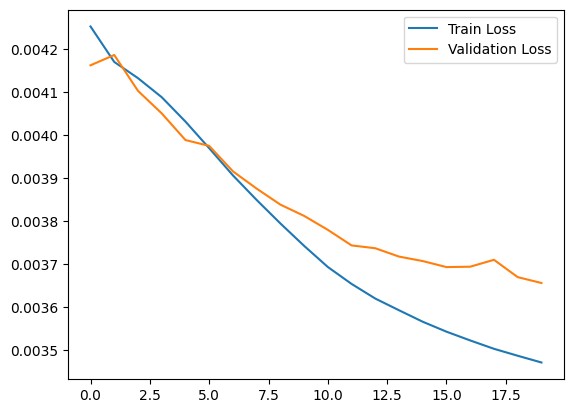

In [73]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


#### Insights from Loss Curves

- **Initial Learning (Epochs 0-4)**: Both training and validation losses steadily decrease, indicating effective learning.
- **Stabilization (Post-Epoch 4)**: Losses continue to drop at a steady rate, showing good generalization.
- **No Overfitting**: Training and validation losses stay close, signaling no overfitting.
- **Convergence (Around Epoch 18)**: The model shows diminishing improvements, suggesting it's nearing optimal performance.